In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/selected_data.csv')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df.head()

,country_name,country_code,indicator_code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,PCT.ENG.STM.THR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,SL.TLF.ACTI.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.709999,80.655998,80.571999,80.462997,80.325996,80.156998,80.140999,80.146004,80.161003,80.179001,80.203003,80.255997,80.331001,80.426003,80.540001,80.662003,80.647003,80.621002,80.566002,80.466003,80.318001,80.221001,80.132004,79.433998,78.738998,78.047997,77.333000,76.581001,76.582001,76.541000
2,Afghanistan,AFG,SL.TLF.CACT.MA.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.779999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.036201,NaN,NaN,NaN,77.046997,NaN,77.076797,NaN,NaN,73.163597,NaN,NaN
3,Afghanistan,AFG,SL.TLF.CACT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.823997,78.761002,78.662003,78.531998,78.369003,78.162003,78.150002,78.168999,78.205002,78.250999,78.306999,78.382004,78.473000,78.580002,78.697998,78.820000,78.778999,78.731003,78.660004,78.551003,78.401001,78.302002,78.208000,77.535004,76.864998,76.197998,75.483002,74.735001,74.707001,74.657997
4,Afghanistan,AFG,SL.TLF.ACTI.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.662000,15.737000,15.783000,15.771000,15.747000,15.781000,15.582000,15.399000,15.270000,15.193000,15.145000,15.338000,15.592000,15.862000,16.118999,16.358999,16.079000,15.806000,15.587000,15.467000,15.469000,15.898000,16.441999,17.424000,18.459999,19.552000,20.704000,21.910000,22.377001,22.566999


In [5]:
df.groupby(by=['indicator_code'])[['country_name', '2018']].count().sort_values(by='2018', ascending=False).head()

,country_name,2018
indicator_code,,
SP.DYN.IMRT.FE.IN,422,384
SP.DYN.IMRT.MA.IN,422,384
SH.IMM.MEAS,422,384
SH.IMM.IDPT,422,384
SP.POP.TOTL,211,210


In [6]:
# SH.IMM.IDPT
# Immunization, DPT (% of children ages 12-23 months)
temp = df[df['indicator_code'] == 'SP.DYN.IMRT.MA.IN'][['country_name', '2018']]
temp.drop_duplicates(inplace=True)
temp.dropna(inplace=True)
temp.reset_index(drop=True, inplace=True)
temp.shape

(192, 2)

In [7]:
df1 = pd.read_csv('../data/parental_leave_oecd.csv')

In [8]:
df1.head()

,country_name,ppl_weeks,ppl_avg_pay_rate,ppl_full_equiv_weeks,p_hcl_weeks,p_hcl_avg_pr,p_hcl_fe_wk,p_tpl_wk,p_tpl_avg_pr,p_tpl_fe_wk,pml_weeks,pml_avg_pay_rate,pml_full_equiv_weeks,m_hcl_weeks,m_hcl_avg_pr,m_hcl_fe_wk,m_tpl_wk,m_tpl_avg_pr,m_tpl_fe_wk
0,Australia,2.0,42.9,0.9,0.0,0.0,0.0,2.0,42.9,0.9,18.0,42.9,7.7,0.0,0.0,0.0,18.0,42.9,7.7
1,Austria,0.0,0.0,0.0,8.7,75.8,6.6,8.7,75.8,6.6,16.0,100.0,16.0,44.0,75.8,33.4,60.0,82.3,49.4
2,Belgium,2.0,73.0,1.5,17.3,20.3,3.5,19.3,25.7,5.0,15.0,63.7,9.6,17.3,20.3,3.5,32.3,40.4,13.1
3,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,49.9,8.0,35.0,53.2,18.6,51.0,52.1,26.6
4,Chile,1.0,100.0,1.0,0.0,0.0,0.0,1.0,100.0,1.0,18.0,100.0,18.0,12.0,100.0,12.0,30.0,100.0,30.0


In [9]:
df1.shape

(42, 19)

In [10]:
set_difference = set(df1['country_name'].values) - set(temp['country_name'].values)
list_difference = list(set_difference)
list_difference

['United States', 'Korea']

In [11]:
df1.replace('United States', 'United States of America', inplace=True)

In [12]:
temp1 = pd.merge(temp, df1, left_on='country_name', right_on='country_name', how='inner')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
temp1.columns

Index(['country_name', '2018', 'ppl_weeks', 'ppl_avg_pay_rate',
       'ppl_full_equiv_weeks', 'p_hcl_weeks', 'p_hcl_avg_pr', 'p_hcl_fe_wk',
       'p_tpl_wk', 'p_tpl_avg_pr', 'p_tpl_fe_wk', 'pml_weeks',
       'pml_avg_pay_rate', 'pml_full_equiv_weeks', 'm_hcl_weeks',
       'm_hcl_avg_pr', 'm_hcl_fe_wk', 'm_tpl_wk', 'm_tpl_avg_pr',
       'm_tpl_fe_wk'],
      dtype='object')

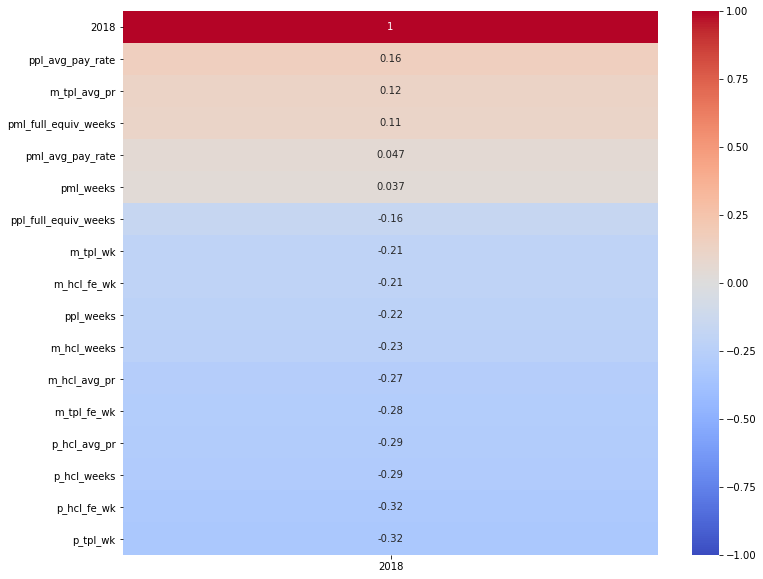

In [15]:
# as paternal leave characteristics worsen, less weeks, mortality rate increases
# there is a negative correlation between the number of weeks of paternity leave and mortality rate in 2018
plt.figure (figsize=(12,10))
sns.heatmap(temp1.corr()[['2018']].sort_values('2018', ascending=False),
            vmax=1, vmin=-1, cmap='coolwarm', annot=True);

In [16]:
features = ['p_tpl_wk', 'p_hcl_fe_wk', 'p_hcl_weeks', 'm_tpl_fe_wk', 'p_hcl_avg_pr']

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [18]:
def calc_metrics(true, pred):
    return print ('RMSE '+ str(np.sqrt(metrics.mean_squared_error(true, pred))) + '\n' +
                  'MSE  ' + str(metrics.mean_squared_error (true, pred)) + '\n' +
                  'R2   ' + str(metrics.r2_score (true, pred)) + '\n' +
                  'MAE  ' + str(metrics.mean_absolute_error(true, pred)))

def calc_scores(model, X_train, y_train, X_test, y_test):
    return print ('Train score  ' + str(model.score (X_train, y_train))  + '\n' +
                  'Test score   ' + str(model.score (X_test, y_test)) + '\n' +
                  'Baseline     ' + str(cross_val_score (model, X_train, y_train).mean()))

In [19]:
X = temp1[features]

In [20]:
y = temp1['2018']

In [21]:
X.shape, y.shape

((41, 5), (41,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_preds = model.predict(X_test)

In [26]:
resids = pd.DataFrame(columns=['true', 'predicted'])

In [27]:
resids['true'] = y_test
resids['predicted'] = y_preds
resids['resids'] = y_test - y_preds

In [28]:
resids

,true,predicted,resids
31,3.3,0.887922,2.412078
7,4.5,4.303041,0.196959
26,13.9,4.641197,9.258803
20,3.0,4.838656,-1.838656
32,6.8,2.461474,4.338526
16,3.6,4.966977,-1.366977
11,2.2,4.456177,-2.256177
37,3.9,5.223878,-1.323878
1,3.2,3.345454,-0.145454
17,1.7,3.170380,-1.470380


In [29]:
calc_metrics(y_test, y_preds)

RMSE 3.3781884792142693
MSE  11.412157401096017
R2   -0.08944461186005381
MAE  2.3210493186840626


In [30]:
calc_scores(model, X_train, y_train, X_test, y_test)

Train score  0.3591533012031841
Test score   -0.08944461186005381
Baseline     -1.0466049044712278


In [36]:
pd.DataFrame(list(zip(X.columns, model.coef_)), columns=['coef_name', 'coef_value'])

,coef_name,coef_value
0,p_tpl_wk,-0.604708
1,p_hcl_fe_wk,-0.095505
2,p_hcl_weeks,0.620033
3,m_tpl_fe_wk,0.005797
4,p_hcl_avg_pr,-0.021375


In [38]:
df = pd.read_csv('../data/labor_indicators_oecd.csv')

In [47]:
df = df[(df['TIME'] == 2018) & (df['IND'] == 'EMP11')]

In [49]:
df.columns

Index(['Country', 'IND', 'SEX', 'AGE', 'TIME', 'Unit', 'Value'], dtype='object')

In [50]:
df = pd.merge(df, df1, left_on='Country', right_on='country_name', how='inner')

In [52]:
df.drop(columns=['Country', 'IND', 'SEX', 'AGE', 'TIME', 'Unit'], inplace=True)

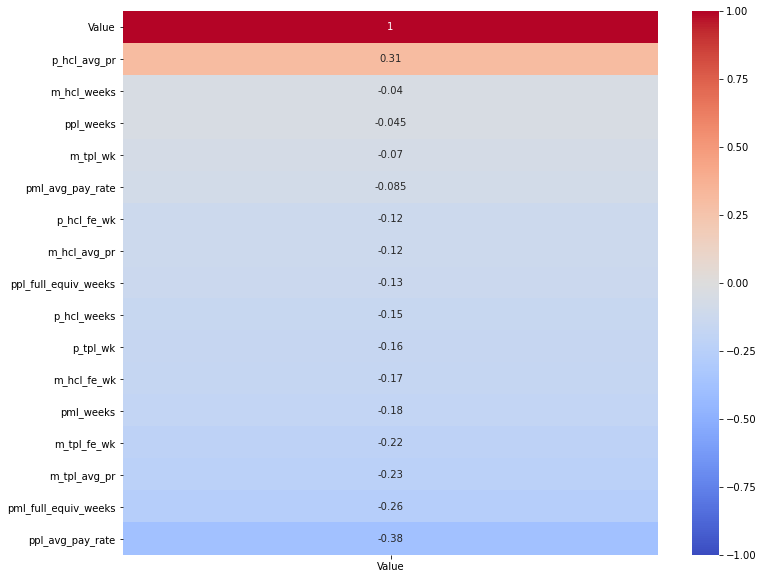

In [56]:
plt.figure (figsize=(12,10))
sns.heatmap(df.corr()[['Value']].sort_values('Value', ascending=False),
            vmax=1, vmin=-1, cmap='coolwarm', annot=True);

In [65]:
X = df[['p_hcl_avg_pr', 'ppl_avg_pay_rate']]
y = df['Value']

In [69]:
X.shape, y.shape

((35, 2), (35,))

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [76]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26, 2), (26,), (9, 2), (9,))

In [77]:
model = LinearRegression()

In [78]:
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_preds = model.predict(X_test)

In [80]:
calc_metrics(y_test, y_preds)

RMSE 11.067554771229904
MSE  122.4907686141738
R2   0.20778341032541592
MAE  10.091050784428685


In [81]:
calc_scores(model, X_train, y_train, X_test, y_test)

Train score  0.15452053255766063
Test score   0.20778341032541592
Baseline     -3.9774227915619145


In [82]:
pd.DataFrame(list(zip(X.columns, model.coef_)), columns=['coef_name', 'coef_value'])

,coef_name,coef_value
0,p_hcl_avg_pr,0.057975
1,ppl_avg_pay_rate,-0.075822
